# DAT210x - Programming with Python for DS

## Module5- Lab1

Start by importing whatever you need to import in order to make this lab work:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from sklearn.cluster import KMeans

### How to Get The Dataset

1. Open up the City of Chicago's [Open Data | Crimes](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2) page.
1. In the `Primary Type` column, click on the `Menu` button next to the info button, and select `Filter This Column`. It might take a second for the filter option to show up, since it has to load the entire list first.
1. Scroll down to `GAMBLING`
1. Click the light blue `Export` button next to the `Filter` button, and select `Download As CSV`

Now that you have th dataset stored as a CSV, load it up being careful to double check headers, as per usual:

In [34]:
df = pd.read_csv("Datasets/Crimes_-_2001_to_present.csv")
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,4647776,HM172874,02/09/2006 10:29:07 PM,075XX S COLFAX AVE,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,7.0,43.0,19,1194833.0,1855572.0,2006,04/15/2016 08:55:02 AM,41.758607,-87.561511,"(41.758607126, -87.561510616)"
1,4649196,HM157167,02/01/2006 12:30:27 PM,038XX W FERDINAND ST,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,27.0,23.0,19,1150871.0,1903067.0,2006,04/15/2016 08:55:02 AM,41.889909,-87.721389,"(41.889909247, -87.721389051)"
2,4649661,HM159623,02/02/2006 07:02:12 PM,050XX W SUPERIOR ST,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,28.0,25.0,19,1142605.0,1904502.0,2006,04/15/2016 08:55:02 AM,41.894005,-87.751710,"(41.89400481, -87.751710086)"
3,4650448,HM158020,02/01/2006 08:13:00 PM,056XX W WASHINGTON BLVD,1661,GAMBLING,GAME/DICE,RESIDENCE PORCH/HALLWAY,True,False,...,29.0,25.0,19,1138430.0,1900175.0,2006,04/15/2016 08:55:02 AM,41.882208,-87.767149,"(41.882207608, -87.767148598)"
4,4650940,HM156984,02/01/2006 10:10:00 AM,015XX W 72ND ST,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,17.0,67.0,19,1167231.0,1856980.0,2006,04/15/2016 08:55:02 AM,41.763106,-87.662629,"(41.763105901, -87.66262925)"


In [3]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

Get rid of any _rows_ that have nans in them:

In [35]:
df = df.dropna(axis = 0)
df.shape

(12993, 22)

Display the `dtypes` of your dset:

In [13]:
df.dtypes

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                             int64
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                         int64
Ward                           float64
Community Area                 float64
FBI Code                         int64
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On              datetime64[ns]
Latitude                       float64
Longitude                      float64
Location                        object
dtype: object

Coerce the `Date` feature (which is currently a string object) into real date, and confirm by displaying the `dtypes` again. This might be a slow executing process...

In [36]:
df["Date"] = pd.to_datetime(df["Date"], errors = "raise") # Use coerce if NANs in dataset
df["Updated On"] = pd.to_datetime(df["Updated On"], errors = "raise")
df.dtypes

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                             int64
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                         int64
Ward                           float64
Community Area                 float64
FBI Code                         int64
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On              datetime64[ns]
Latitude                       float64
Longitude                      float64
Location                        object
dtype: object

In [37]:
df.iloc[: , 19:21].head()

,Latitude,Longitude
0,41.758607,-87.561511
1,41.889909,-87.721389
2,41.894005,-87.751710
3,41.882208,-87.767149
4,41.763106,-87.662629


In [38]:
pd.concat([df.Longitude, df.Latitude], axis = 1).head()

,Longitude,Latitude
0,-87.561511,41.758607
1,-87.721389,41.889909
2,-87.751710,41.894005
3,-87.767149,41.882208
4,-87.662629,41.763106


In [39]:
def doKMeans(df,init):
    # Let's plot your data with a '.' marker, a 0.3 alpha at the Longitude,
    # and Latitude locations in your dataset. Longitude = x, Latitude = y
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(df.Longitude, df.Latitude, marker='.', alpha=0.3)

    
    # TODO: Filter `df` using indexing so it only contains Longitude and Latitude,
    # since the remaining columns aren't really applicable for this lab:
    #df = df.iloc[:, 19:21]
    df = pd.concat([df.Longitude, df.Latitude], axis = 1)

    # TODO: Use K-Means to try and find seven cluster centers in this df.
    # Be sure to name your kmeans model `model` so that the printing works.
    model = KMeans(n_clusters = 7, max_iter = 300, n_init = 80, init = init)
    model.fit(df)
    labels = model.predict(df)

    # Now we can print and plot the centroids:
    centroids = model.cluster_centers_
    print(centroids)
    ax.scatter(centroids[:,0], centroids[:,1], marker='x', c='red', alpha=0.5, linewidths=3, s=169)
    plt.show()

[[-87.63109897  41.69663084]
 [-87.70963398  41.87811713]
 [-87.66467033  41.7727438 ]
 [-87.75689425  41.89340277]
 [-87.58264733  41.75267701]
 [-87.68501799  41.98177431]
 [-87.61951255  41.80359788]]


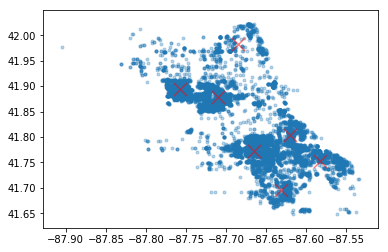

[[-87.75696406  41.89329339]
 [-87.68540588  41.9813113 ]
 [-87.61952555  41.80353324]
 [-87.58262293  41.75266472]
 [-87.63109897  41.69663084]
 [-87.66471538  41.7727555 ]
 [-87.70961577  41.87812462]]


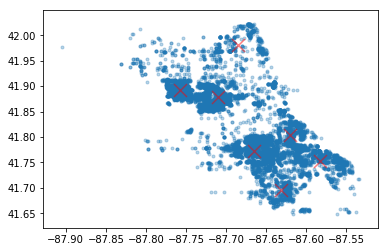

In [42]:
# Print & Plot your data
doKMeans(df,"k-means++")
doKMeans(df,"random")

Filter out the data so that it only contains samples that have a `Date > '2011-01-01'`, using indexing. Then, in a new figure, plot the crime incidents, as well as a new K-Means run's centroids.

In [43]:
df.shape

(12993, 22)

In [49]:
df = pd.read_csv("Datasets/Crimes_-_2001_to_present.csv")
df = df.dropna(axis = 0)
df["Date"] = pd.to_datetime(df["Date"], errors = "raise") # Use coerce if NANs in dataset
df["Updated On"] = pd.to_datetime(df["Updated On"], errors = "raise")
df = df[df.Date > '2011-01-01']
df["Date"].unique()

array(['2016-05-04T19:15:00.000000000', '2016-04-08T23:46:00.000000000',
       '2016-05-11T11:45:00.000000000', ...,
       '2017-10-05T20:10:00.000000000', '2017-10-08T21:25:00.000000000',
       '2017-10-09T12:29:00.000000000'], dtype='datetime64[ns]')

[[-87.66479828  41.77555222]
 [-87.75481756  41.88987542]
 [-87.71064483  41.87539581]
 [-87.63428847  41.70527517]
 [-87.68692804  41.98387683]
 [-87.61886508  41.79203914]
 [-87.57993318  41.75077457]]


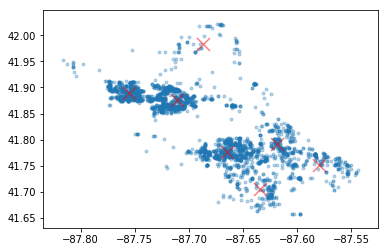

[[-87.68692804  41.98387683]
 [-87.66479308  41.77567188]
 [-87.61886508  41.79203914]
 [-87.75481756  41.88987542]
 [-87.71064483  41.87539581]
 [-87.5801686   41.75055674]
 [-87.63487655  41.70533979]]


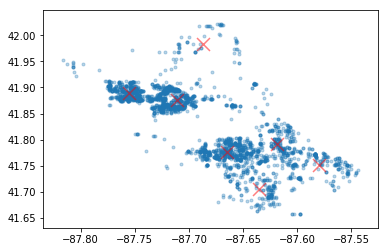

In [51]:
# Print & Plot your data
doKMeans(df,"k-means++")
doKMeans(df,"random")